In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/ordermedic.csv")
df['DATE']=pd.to_datetime(df['DATE'], infer_datetime_format=True)

In [ ]:
df.sort_values(by=['DATE'])

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4
8,9,pavan,"Rk Singh Marg,Delhi,India",9566148832,pavan369@gmail.com,2020-01-11 06:03:00,4
9,10,karthik,"Lal Kuan,Delhi,India",9966622333,karthik111@gmail.com,2020-01-11 06:36:00,4
19,20,sadik,"Devli Road,Delhi,India",9652447816,sadiksaibu@gmail.com,2020-01-11 07:07:00,1
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2
7,8,bhagat,"Palika Bazar,Delhi,India",9163248579,singh143@gmail.com,2020-01-11 15:12:00,5
12,13,harthik,"New Arya Samaj Road,Delhi,India",9562317823,harthik143@gmail.com,2020-01-11 16:19:00,2
18,19,sohel,"Wazirpur Industrial Area,Delhi,India",6001285439,sohelbhasa@gmail.com,2020-01-11 17:16:00,4
13,14,venky,"Gurgaon,Delhi,India",9898986235,venky143@gmail.com,2020-01-11 19:20:00,1


In [ ]:
df.sort_values(by=['PRIORITY'],ascending=False)

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5
6,7,yaseen,"Pushpa Market,Delhi,India",9534698712,sheik124@gmail.com,2020-02-11 17:12:00,5
7,8,bhagat,"Palika Bazar,Delhi,India",9163248579,singh143@gmail.com,2020-01-11 15:12:00,5
8,9,pavan,"Rk Singh Marg,Delhi,India",9566148832,pavan369@gmail.com,2020-01-11 06:03:00,4
18,19,sohel,"Wazirpur Industrial Area,Delhi,India",6001285439,sohelbhasa@gmail.com,2020-01-11 17:16:00,4
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4
9,10,karthik,"Lal Kuan,Delhi,India",9966622333,karthik111@gmail.com,2020-01-11 06:36:00,4
11,12,manideep,"Wazirpur Industrial Area,Delhi,India",9490651238,mani@gmail.com,2020-02-11 16:18:00,3
10,11,manoj,"Uttam nagar,Delhi,India",9458613278,manoj555@gmail.com,2020-02-11 14:15:00,3
2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3


In [ ]:
df.sort_values(by=['DATE','PRIORITY'])

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4
8,9,pavan,"Rk Singh Marg,Delhi,India",9566148832,pavan369@gmail.com,2020-01-11 06:03:00,4
9,10,karthik,"Lal Kuan,Delhi,India",9966622333,karthik111@gmail.com,2020-01-11 06:36:00,4
19,20,sadik,"Devli Road,Delhi,India",9652447816,sadiksaibu@gmail.com,2020-01-11 07:07:00,1
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2
7,8,bhagat,"Palika Bazar,Delhi,India",9163248579,singh143@gmail.com,2020-01-11 15:12:00,5
12,13,harthik,"New Arya Samaj Road,Delhi,India",9562317823,harthik143@gmail.com,2020-01-11 16:19:00,2
18,19,sohel,"Wazirpur Industrial Area,Delhi,India",6001285439,sohelbhasa@gmail.com,2020-01-11 17:16:00,4
13,14,venky,"Gurgaon,Delhi,India",9898986235,venky143@gmail.com,2020-01-11 19:20:00,1


In [ ]:
!pip install geopandas
!pip install geopy
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 305kB/s 
     |████████████████████████████████| 10.9MB 36.2MB/s 


In [ ]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['ADDRESS'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
df.head()

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY,location,point
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5,"(Kamla Nagar, Civil Lines Tehsil, Central Delh...","(28.680344249999997, 77.20212920033055, 0.0)"
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4,"(Shiva Enclave West, Patel Nagar Tehsil, West ...","(28.64097145, 77.04471671211414, 0.0)"
2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3,"(Faiz Road, Karol Bagh, Karol Bagh Tehsil, Cen...","(28.6472665, 77.1982147, 0.0)"
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2,"(Chandan Market, Greater Kailash II, Kalkaji T...","(28.53074695, 77.24596265669813, 0.0)"
4,5,sriram,"Lajpat Nagar,Delhi,India",9674581238,srir1528@gmail.com,2020-02-11 19:06:00,1,"(Lajpat Nagar, Shiv Mandir Marg, Lajpat Nagar ...","(28.5792615, 77.2440325, 0.0)"


In [ ]:
# split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head()

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY,location,point,latitude,longitude,altitude
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5,"(Kamla Nagar, Civil Lines Tehsil, Central Delh...","(28.680344249999997, 77.20212920033055, 0.0)",28.680344,77.202129,0.0
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4,"(Shiva Enclave West, Patel Nagar Tehsil, West ...","(28.64097145, 77.04471671211414, 0.0)",28.640971,77.044717,0.0
2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3,"(Faiz Road, Karol Bagh, Karol Bagh Tehsil, Cen...","(28.6472665, 77.1982147, 0.0)",28.647267,77.198215,0.0
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2,"(Chandan Market, Greater Kailash II, Kalkaji T...","(28.53074695, 77.24596265669813, 0.0)",28.530747,77.245963,0.0
4,5,sriram,"Lajpat Nagar,Delhi,India",9674581238,srir1528@gmail.com,2020-02-11 19:06:00,1,"(Lajpat Nagar, Shiv Mandir Marg, Lajpat Nagar ...","(28.5792615, 77.2440325, 0.0)",28.579262,77.244033,0.0


In [ ]:
df.head()

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY,location,point,latitude,longitude,altitude
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5,"(Kamla Nagar, Civil Lines Tehsil, Central Delh...","(28.680344249999997, 77.20212920033055, 0.0)",28.680344,77.202129,0.0
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4,"(Shiva Enclave West, Patel Nagar Tehsil, West ...","(28.64097145, 77.04471671211414, 0.0)",28.640971,77.044717,0.0
2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3,"(Faiz Road, Karol Bagh, Karol Bagh Tehsil, Cen...","(28.6472665, 77.1982147, 0.0)",28.647267,77.198215,0.0
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2,"(Chandan Market, Greater Kailash II, Kalkaji T...","(28.53074695, 77.24596265669813, 0.0)",28.530747,77.245963,0.0
4,5,sriram,"Lajpat Nagar,Delhi,India",9674581238,srir1528@gmail.com,2020-02-11 19:06:00,1,"(Lajpat Nagar, Shiv Mandir Marg, Lajpat Nagar ...","(28.5792615, 77.2440325, 0.0)",28.579262,77.244033,0.0


In [ ]:
df.latitude.isnull().sum()

1

In [ ]:
df = df[pd.notnull(df["latitude"])]

In [ ]:
map1 = folium.Map(
    location=[28.640971,77.044717],
    tiles='cartodbpositron',
    zoom_start=12,
)

In [ ]:
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [ ]:
df

,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY,location,point,latitude,longitude,altitude
0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5,"(Kamla Nagar, Civil Lines Tehsil, Central Delh...","(28.680344249999997, 77.20212920033055, 0.0)",28.680344,77.202129,0.0
1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4,"(Shiva Enclave West, Patel Nagar Tehsil, West ...","(28.64097145, 77.04471671211414, 0.0)",28.640971,77.044717,0.0
2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3,"(Faiz Road, Karol Bagh, Karol Bagh Tehsil, Cen...","(28.6472665, 77.1982147, 0.0)",28.647267,77.198215,0.0
3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2,"(Chandan Market, Greater Kailash II, Kalkaji T...","(28.53074695, 77.24596265669813, 0.0)",28.530747,77.245963,0.0
4,5,sriram,"Lajpat Nagar,Delhi,India",9674581238,srir1528@gmail.com,2020-02-11 19:06:00,1,"(Lajpat Nagar, Shiv Mandir Marg, Lajpat Nagar ...","(28.5792615, 77.2440325, 0.0)",28.579262,77.244033,0.0
5,6,hrithik,"Rohini,Delhi,India",9812367459,hrithik@gmail.com,2020-02-11 22:22:00,0,"(Rohini, Rohini Tehsil, North West Delhi, Delh...","(28.7162092, 77.1170743, 0.0)",28.716209,77.117074,0.0
7,8,bhagat,"Palika Bazar,Delhi,India",9163248579,singh143@gmail.com,2020-01-11 15:12:00,5,"(Palika Bazar, Way to Palika Car Parking, Pall...","(28.6307613, 77.2189172, 0.0)",28.630761,77.218917,0.0
8,9,pavan,"Rk Singh Marg,Delhi,India",9566148832,pavan369@gmail.com,2020-01-11 06:03:00,4,"(Maharaja Ranjeet Singh Marg, Shankar Market, ...","(28.6297157, 77.2270108, 0.0)",28.629716,77.227011,0.0
9,10,karthik,"Lal Kuan,Delhi,India",9966622333,karthik111@gmail.com,2020-01-11 06:36:00,4,"(Lal Kuan, Mehrauli Badarpur Road, Tughlakabad...","(28.5026215, 77.2845419, 0.0)",28.502622,77.284542,0.0
10,11,manoj,"Uttam nagar,Delhi,India",9458613278,manoj555@gmail.com,2020-02-11 14:15:00,3,"(Uttam Nagar, Patel Nagar Tehsil, West Delhi, ...","(28.6190739, 77.0566861, 0.0)",28.619074,77.056686,0.0


In [ ]:
df.shape

(19, 12)

In [ ]:
len(df)

19

In [ ]:
df.to_csv('orders.csv')

In [ ]:
df1=pd.read_csv('/content/orders.csv')
df1

,Unnamed: 0,ORDER_ID,NAME,ADDRESS,PH_NO,GMAIL,DATE,PRIORITY,location,point,latitude,longitude,altitude
0,0,1,sukesh,"Kamla Nagar,Delhi,India",8497997380,suk123@gmail.com,2020-01-11 02:45:00,5,"Kamla Nagar, Civil Lines Tehsil, Central Delhi...","(28.680344249999997, 77.20212920033055, 0.0)",28.680344,77.202129,0.0
1,1,2,kiran,"Shiva Road,Delhi,India",8428128985,kir123@gmail.com,2020-01-11 02:47:00,4,"Shiva Enclave West, Patel Nagar Tehsil, West D...","(28.64097145, 77.04471671211414, 0.0)",28.640971,77.044717,0.0
2,2,3,vishwa,"Faiz Road,Delhi,India",8496531278,vish123@gmail.com,2020-02-11 18:54:00,3,"Faiz Road, Karol Bagh, Karol Bagh Tehsil, Cent...","(28.6472665, 77.1982147, 0.0)",28.647266,77.198215,0.0
3,3,4,hemanth,"Chandan Market,Delhi,India",8674593218,hem5678@gmail.com,2020-01-11 12:02:00,2,"Chandan Market, Greater Kailash II, Kalkaji Te...","(28.53074695, 77.24596265669813, 0.0)",28.530747,77.245963,0.0
4,4,5,sriram,"Lajpat Nagar,Delhi,India",9674581238,srir1528@gmail.com,2020-02-11 19:06:00,1,"Lajpat Nagar, Shiv Mandir Marg, Lajpat Nagar I...","(28.5792615, 77.2440325, 0.0)",28.579261,77.244032,0.0
5,5,6,hrithik,"Rohini,Delhi,India",9812367459,hrithik@gmail.com,2020-02-11 22:22:00,0,"Rohini, Rohini Tehsil, North West Delhi, Delhi...","(28.7162092, 77.1170743, 0.0)",28.716209,77.117074,0.0
6,7,8,bhagat,"Palika Bazar,Delhi,India",9163248579,singh143@gmail.com,2020-01-11 15:12:00,5,"Palika Bazar, Way to Palika Car Parking, Palli...","(28.6307613, 77.2189172, 0.0)",28.630761,77.218917,0.0
7,8,9,pavan,"Rk Singh Marg,Delhi,India",9566148832,pavan369@gmail.com,2020-01-11 06:03:00,4,"Maharaja Ranjeet Singh Marg, Shankar Market, N...","(28.6297157, 77.2270108, 0.0)",28.629716,77.227011,0.0
8,9,10,karthik,"Lal Kuan,Delhi,India",9966622333,karthik111@gmail.com,2020-01-11 06:36:00,4,"Lal Kuan, Mehrauli Badarpur Road, Tughlakabad,...","(28.5026215, 77.2845419, 0.0)",28.502622,77.284542,0.0
9,10,11,manoj,"Uttam nagar,Delhi,India",9458613278,manoj555@gmail.com,2020-02-11 14:15:00,3,"Uttam Nagar, Patel Nagar Tehsil, West Delhi, D...","(28.6190739, 77.0566861, 0.0)",28.619074,77.056686,0.0


In [ ]:
!pip install Dijkstar

  Created wheel for Dijkstar: filename=Dijkstar-2.5.0-cp36-none-any.whl size=12171 sha256=620dce68e8af34a6854cfe8da8e0eba1c8b058a19c75da6611ee1e15dfa63133
  Stored in directory: /root/.cache/pip/wheels/01/db/b1/ffb012fd94cac8f0cdbf03e665a9894e27cd5cc36bb5823dfd
Successfully built Dijkstar


In [ ]:
from dijkstar import Graph, find_path
graph=Graph()

In [ ]:
n=df1.shape[0]+1
n

20

In [ ]:
from geopy.distance import geodesic 
geodesic((df1['latitude'][0],df1['longitude'][0]),(df1['latitude'][1],df1['longitude'][1])).km

15.994690098524796

In [ ]:
for i in range(n-1):
  for j in range(n-1):
    graph.add_edge(i,j,geodesic((df1['latitude'][i],df1['longitude'][i]),(df1['latitude'][j],df1['longitude'][j])).km)

In [ ]:
find_path(graph,0,16)

PathInfo(nodes=[0, 16], edges=[18.723942073603304], costs=[18.723942073603304], total_cost=18.723942073603304)

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
g=nx.Graph()


In [ ]:
m=[]
for i in range(n-1):
  for j in range(n-1):
    m.append((i,j,geodesic((df1['latitude'][i],df1['longitude'][i]),(df1['latitude'][j],df1['longitude'][j])).km))

In [ ]:
g.add_weighted_edges_from(m)

In [ ]:
print(nx.dijkstra_path(g,1,16))

[1, 16]


In [ ]:
from collections import defaultdict

class Graph:

	def __init__(self, vertices):
		self.V = vertices 
		self.graph = [] 
		
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	def find(self, parent, x1):
		if parent[x1] == x1:
			return x1
		return self.find(parent, parent[x1])

	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)

		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot

		else:
			parent[yroot] = xroot
			rank[xroot] += 1

	def KruskalMST(self):

		result = [] 
		
		i = 0
		
		e = 0

		self.graph = sorted(self.graph, 
							key=lambda item: item[2])

		parent = []
		rank = []

		
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		
		while e < self.V - 1:

			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)

		minimumCost = 0
		print ("Edges in the constructed MST")
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Distance to deliver" , minimumCost)


g1 = Graph(n-1)
for i in range(n-1):
  for j in range(n-1):
    g1.addEdge(i,j,geodesic((df1['latitude'][i],df1['longitude'][i]),(df1['latitude'][j],df1['longitude'][j])).km)

g1.KruskalMST()

Edges in the constructed MST
10 -- 17 == 0
16 -- 18 == 0
2 -- 11 == 0
6 -- 7 == 0
3 -- 13 == 2
3 -- 16 == 2
1 -- 9 == 2
2 -- 6 == 2
4 -- 13 == 3
0 -- 11 == 3
0 -- 10 == 4
3 -- 8 == 4
7 -- 15 == 4
9 -- 14 == 4
5 -- 10 == 5
4 -- 7 == 5
1 -- 5 == 10
12 -- 14 == 14
Minimum Distance to deliver 73.64771896615031


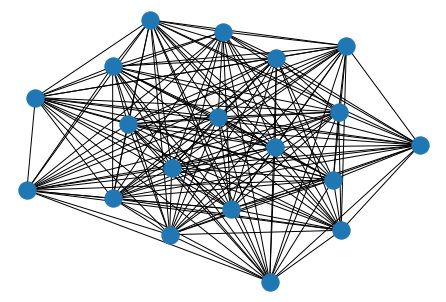

In [ ]:
nx.draw(g)